# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Perform SVD on the training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)

    # Reduce the dimensions by selecting the first 'n_components' singular values and vectors
    X_train_reduced = np.dot(U_train[:, :n_components], np.diag(S_train[:n_components]))

    # Perform SVD on the test data
    U_test, S_test, Vt_test = np.linalg.svd(X_test, full_matrices=False)
    X_test_reduced = np.dot(U_test[:, :n_components], np.diag(S_test[:n_components]))

    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
# Define the number of SVD components to experiment with
svd_components = [50, 100, 200, 300, 400, 500, 784]  # You can modify this list for testing

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results for later visualization
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.3327, Training time: 15.3789 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.3462, Training time: 58.2960 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.3223, Training time: 150.6726 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.3226, Training time: 245.3812 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.3194, Training time: 439.5515 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.3181, Training time: 527.8434 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.3190, Training time: 873.0950 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


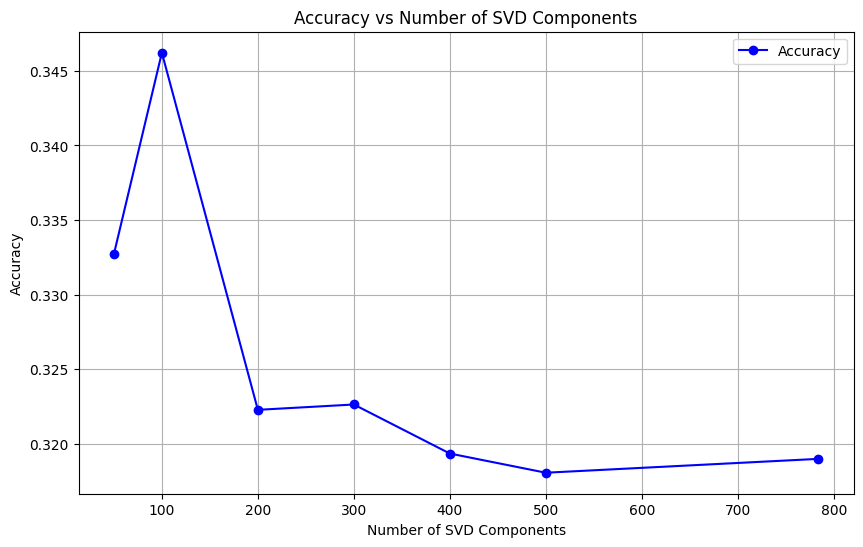

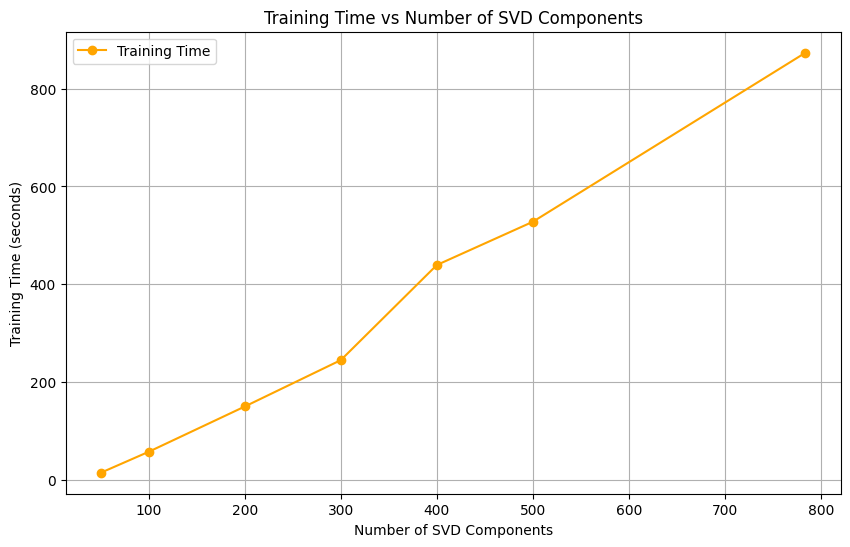

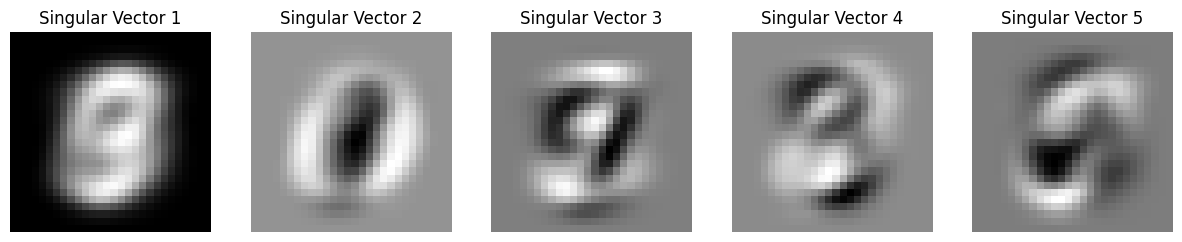

In [6]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Assuming 'results' contains the list of tuples (n_components, accuracy, training_time) from Part 4
# Unpack the results into separate lists for plotting
components = [result[0] for result in results]   # SVD components
accuracies = [result[1] for result in results]   # Accuracy values
times = [result[2] for result in results]        # Training times

# Plot Accuracy vs SVD components
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', label='Accuracy', color='blue')
plt.title('Accuracy vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot Training Time vs SVD components
plt.figure(figsize=(10, 6))
plt.plot(components, times, marker='o', label='Training Time', color='orange')
plt.title('Training Time vs Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

# Function to visualize top singular vectors as 28x28 images
def visualize_singular_vectors(Vt, top_n=5):
    fig, axes = plt.subplots(1, top_n, figsize=(15, 4))
    for i in range(top_n):
        singular_vector_image = Vt[i].reshape(28, 28)  # Reshape to 28x28 image
        axes[i].imshow(singular_vector_image, cmap='gray')
        axes[i].set_title(f'Singular Vector {i+1}')
        axes[i].axis('off')
    plt.show()

# Apply SVD to the full dataset and get the top singular vectors
_, _, Vt_full = np.linalg.svd(X, full_matrices=False)  # SVD on the entire dataset
visualize_singular_vectors(Vt_full, top_n=5)  # Visualize the top 5 singular vectors


## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
# In the Accuracy vs Number of SVD Components graph, we can observe that accuracy peaks at 100 components, with a noticeable drop afterward. Accuracy remains relatively stable from 200 components onward, but it is consistently lower than the peak observed at 100 components. This suggests that 100 components capture the most significant information in the dataset for classification purposes.
#In the Training Time vs Number of SVD Components graph, training time shows a steady increase as the number of SVD components grows. This indicates that as you increase the number of SVD components, the computational cost rises significantly, without corresponding improvements in accuracy.
#We visualized the top 5 singular vectors, which reveal key patterns in the dataset. These vectors align with the performance improvements at 100 components, confirming that 100 SVD components offer the best balance between accuracy and efficiency
#Therefore, 100 SVD components appear to be the best choice. This number strikes a balance between achieving high accuracy and maintaining a reasonable computational cost.